In [2]:
import pandas as pd

speed_per_day = pd.read_csv("./metrics-calculation/speed-calculation/statistics/1-speed_per_vehicle_stats.csv")
speed_per_day.head(5)

,day,n_vehicles,n_lines,n_vehicles_lines,avg_speed,avg_speed_min,avg_speed_max,avg_speed_stddev,avg_speed_quantile_6.25,avg_speed_quantile_12.5,avg_speed_quantile_25,avg_speed_quantile_50,avg_speed_quantile_75
0,MO_15101,14004,2071,29702,13.661619,0.216087,43.253766,4.032125,8.105143,9.920853,11.484203,13.491341,15.814732
1,MO_15102,14006,2080,29830,13.472536,0.215484,48.852402,3.969593,7.952510,9.823276,11.361074,13.299600,15.570455
2,MO_15103,10548,1871,20087,13.696948,0.161638,46.956914,4.881822,5.265949,9.167012,11.364083,13.721299,16.477192
3,MO_15104,7614,1751,14131,14.591877,0.167213,47.098071,5.826973,2.898824,8.507270,11.810078,14.891262,18.137630
4,MO_15105,13955,2072,29637,13.699473,0.244892,65.146744,4.040148,8.011532,9.963049,11.551267,13.537739,15.829789


In [ ]:
# average speed per day

day_column = [day for day in range(1,32)]
speed_per_day["day"] = day_column

ax = speed_per_day.plot.bar(x ="day",y = "avg_speed",title=f"Velocidade média de ônibus por dia",figsize=(10,8))
# x axis label
ax.set_xlabel("dia",size=15)
# y axis label
ax.set_ylabel("velocidade média (km/h)",size=15)
# y range
ax.set_ylim(0,16)
# size of the number in both axis
ax.tick_params(axis='both', which='major', labelsize=15)
# for p in ax.patches:
#     ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.00, p.get_height() * 1.006),size=13)
# title fontsize
ax.title.set_size(20)

# saving chart as png
ax.get_figure().savefig('./charts-results/avg-speed-per-day.png')


In [ ]:
# Boxplot pandas - https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/
# Boxplot pandas - https://www.simplypsychology.org/boxplots.html

import matplotlib.pyplot as plt

for i in range(0,31):
    fig, ax = plt.subplots()

    boxes = [
        {
            'label' : f"Intervalos da velocidade média de ônibus no dia {i+1}-10-2015",
            'whislo': speed_per_day["avg_speed_min"][i],    # Bottom whisker position
            'q1'    : speed_per_day["avg_speed_quantile_25"][i],    # First quartile (25th percentile)
            'med'   : speed_per_day["avg_speed_quantile_50"][i],    # Median         (50th percentile)
            'q3'    : speed_per_day["avg_speed_quantile_75"][i],    # Third quartile (75th percentile)
            'whishi': speed_per_day["avg_speed_max"][i],    # Top whisker position
            'fliers': [],        # Outliers,
            'mean':   speed_per_day["avg_speed"][i]
        }
    ]

    ax.bxp(boxes, showfliers=False)


    ax.set_ylabel("velocidade (km/h)")
    plt.plot()
    plt.savefig(f"./charts-results/boxplot-avg-speed-day/avg-speed_day_boxplot_{i+1}-10-2015.png")
    plt.close()

In [21]:
# average speed per hour per day
import pandas as pd
import matplotlib.pyplot as plt

for day in range(1,32):

    speed_per_hour = pd.read_parquet(f"./metrics-calculation/speed-calculation/speed-per-hour-per-day/MO_1510{day}/").sort_values(by=["hour_avl"])

    ax = speed_per_hour.plot(x="hour_avl",y ="avg_speed",title=f"Velocidade média de ônibus por hora - {day}/10/2015",figsize=(10,8))
    # x axis label
    ax.set_xlabel("hora",size=20)
    # y axis label
    ax.set_ylabel("velocidade média (km/h)",size=20)
    # Setting x axis ticks
#     plt.xticks([hour for hour in range(6,23)])
    # Title size
    ax.title.set_size(20)

    # size of the number in both axis
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.grid(True)

    # saving chart as png
    ax.get_figure().savefig(f'./charts-results/speed-per-hour-charts/avg-speed-per-hour-day-{day}-10-2015.png',bbox_inches='tight')
    plt.close()

In [ ]:
len(speed_per_hour)

In [37]:
# average speed per region per day
# plotting on map using colormap --> https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

import geopandas as gpd
import matplotlib

# Sao Paulo shape
sp = gpd.read_file("./shape-files-sp/DISTRITO_MUNICIPAL_SP_SMDUPolygon.shp")
font = {'size': 20}

matplotlib.rc('font', **font)
for day in range(1,32):
    # speed by region per day
    speed_region = pd.read_parquet(f"./metrics-calculation/speed-calculation/speed-per-region-per-day/MO_1510{day}/")
    
    # getting the shape of the region
    df_final = pd.merge(speed_region, sp, left_on = "region", right_on = "Nome").drop(columns = ["Nome"])
    
    geo_df = gpd.GeoDataFrame(df_final, geometry = "geometry")
   
    # Plotting map
    ax = geo_df.plot(column="avg_speed",legend=True,cmap='RdBu',figsize = (15,15),legend_kwds={'label': "velocidade média (km/h)"})
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    plt.savefig(f'./charts-results/speed-region-day/speed-by-region-day_{day}-10-2015.png',bbox_inches='tight')
    plt.close()

In [ ]:
# average speed per hour/per region/per day

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Sao Paulo shape
sp = gpd.read_file("./shape-files-sp/DISTRITO_MUNICIPAL_SP_SMDUPolygon.shp")

# analyzing weekends sat/sundays, holidays, workind days
day_to_analyze = [1,17,4,12,20]

for day in day_to_analyze:
    # reading traces
    speed_per_hour_per_region = pd.read_parquet(f"./metrics-calculation/speed-calculation/speed-per-hour-per-region-per-day/MO_1510{day}/")
    
    # getting the shape of the region
    df_with_shape = pd.merge(speed_per_hour_per_region, sp, left_on = "region", right_on = "Nome").drop(columns = ["Nome"])
    
    for hour in list(range(6,23)):
        df = df_with_shape[df_with_shape["hour_avl"] == hour]
        geo_df = gpd.GeoDataFrame(df, geometry = "geometry")
        # Plotting map
        geo_df.plot(column="avg_speed",legend=True,cmap='RdBu',figsize = (15,15),legend_kwds={'label': "velocidade média (km/h)"})
        plt.savefig(f'./charts-results/speed-hour-region-day/{day}-10-2015/speed-per-hour-per-region-day_hour-{hour}_{day}-10-2015.png')
        plt.close()

In [ ]:
### just training

In [ ]:
# PDF/ CDF --> https://stackoverflow.com/questions/25577352/plotting-cdf-of-a-pandas-series-in-python

In [ ]:
# Find distribution 
#ECDF --> https://towardsdatascience.com/how-to-generate-ecdf-plot-using-python-and-r-247ef81fbf3f

In [ ]:
# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [ ]:
#https://www.kite.com/python/answers/how-to-fit-data-to-a-distribution-in-python

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = scipy.stats.distributions.dgamma.fit(list(speed_per_day["avg_speed"]))

print(t)
x = np.linspace(13,15,100)

df_novo = speed_per_day.loc[speed_per_day["avg_speed"] < 14]

fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

plt.hist(list(df_novo["avg_speed"]), density=True)

plt.plot(x,fitted_data,'r-')

In [ ]:
dir(scipy.stats.distributions)

In [ ]:
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
#https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
# https://www.johndcook.com/blog/distributions_scipy/
df = speed_per_day.loc[speed_per_day["avg_speed"]<14]
from scipy import stats
#list_of_dists = ['bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
list_of_dists = ["expon","gamma","lognorm","norm",'weibull_min','weibull_max',"exponweib"]
# exponencial,gamma,lognormal,normal,weibull
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df["avg_speed"])
    a = stats.kstest(df["avg_speed"], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

In [ ]:
# https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
# https://github.com/amirarsalan90/dist_fitting_medium/blob/master/dist_fitting.ipynb
# https://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

In [ ]:
plt.hist(speed_per_day["avg_speed"])

In [ ]:
dir(stats)

In [ ]:
data = np.random.normal(0, 0.5, 1000)


t1,t2,t3 = scipy.stats.distributions.gennorm.fit(data)


x = np.linspace(-5,5,100)


In [ ]:
(1.9753053701013514, -0.0008095699877689374, 0.6912687108373308)

In [ ]:
list_of_dists = ["expon","gamma","lognomr","norm",'weibull_min','weibull_max']

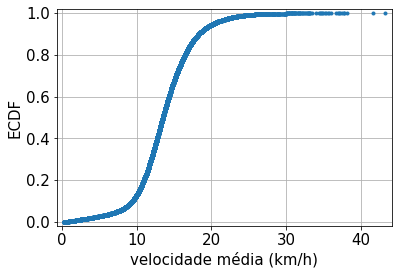

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_parquet("./metrics-calculation/speed-calculation/speed-per-vehicle/MO_15101/")


x= np.sort(df["avg_speed"])
y= np.arange(1,len(x)+1) / len(x)
plt.plot(x,y,marker=".",linestyle="none")
ax = plt.gca()
plt.margins(0.02)

ax.set_xlabel("velocidade média (km/h)",size=15)
# y axis label
ax.set_ylabel("ECDF",size=15)

#title fontsize
ax.title.set_size(20)
plt.grid(True)
# size of the number in both axis
ax.tick_params(axis='both', which='major', labelsize=15)
plt.savefig("./charts-results/speed-ecdf-1-10.png",dpi=300)

,id_avl,line_id,avg_speed,speed_stddev
0,11239,1695,10.575260,9.424090
1,11462,32874,11.875606,12.713971
2,13437,14,10.941400,9.580270
3,13710,34218,18.025252,17.073166
4,35883,501,17.007117,11.751169
